# Proyek Analisis Data: Automobile dataset


## Menyiapkan semua library yang dibutuhkan

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import sqlite3
import sqlalchemy
%matplotlib inline
df_automobile = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Automobile.csv')
df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Wrangling (Merapikan Data)

### Gathering Data (Pengumpulan Data)

####Identifikasi type data

In [56]:
df_automobile.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

####Statistik deskripsi data

In [57]:
df_automobile.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [58]:
df_automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Assessing Data (Penilaian Data)

In [59]:
df_automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [60]:
print("Jumlah duplikasi: ", df_automobile.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data (Pembersihan Data)

####Temukan outlier(keanehan data) pada kolom normalized-losses

In [61]:
# Find out number of records having '?' value for normalized losses
df_automobile[df_automobile['normalized-losses'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [62]:
df_automobile['normalized-losses'].loc[df_automobile['normalized-losses'] == '?'].count()

41

Mean dan median adalah dua ukuran pemusatan data yang memiliki kelebihan dan kekurangan masing-masing. Pemilihan mean atau median tergantung pada tujuan analisis data.
Jika data memiliki outlier, maka median merupakan ukuran pemusatan data yang lebih tepat untuk digunakan.

In [63]:
nl1 = df_automobile['normalized-losses'].loc[df_automobile['normalized-losses'] != '?']
nlmean1 = nl1.astype(str).astype(int).median()
nl2 = df_automobile['normalized-losses'].loc[df_automobile['normalized-losses'] != '?']
nlmean2 = nl2.astype(str).astype(int).mean()
print(nlmean1)
print(nlmean2)

#Mean dan median adalah dua ukuran pemusatan data yang memiliki kelebihan dan kekurangan masing-masing. Pemilihan mean atau median tergantung pada tujuan analisis data.
#Jika data memiliki outlier, maka median merupakan ukuran pemusatan data yang lebih tepat untuk digunakan.


115.0
122.0


In [64]:
# Setting the missing value to median of normalized losses(nl) and conver the datatype to integer
nl = df_automobile['normalized-losses'].loc[df_automobile['normalized-losses'] != '?']
nlmeadian = nl.astype(str).astype(int).median()
df_automobile['normalized-losses'] = df_automobile['normalized-losses'].replace('?',nlmeadian).astype(int)
df_automobile['normalized-losses'].head()

0    115
1    115
2    115
3    164
4    164
Name: normalized-losses, dtype: int64

####Temukan outlier(keanehan data) pada kolom price

In [65]:
# Find out the number of values which are not numeric
df_automobile['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [66]:
# List out the values which are not numeric
df_automobile['price'].loc[df_automobile['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [67]:
#Setting the missing value to median of price and convert the datatype to integer
price = df_automobile['price'].loc[df_automobile['price'] != '?']
pricemean = price.astype(str).astype(int).median()
df_automobile['price'] = df_automobile['price'].replace('?',pricemean).astype(int)
df_automobile['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

####Temukan outlier(keanehan data) pada kolom horsepower

In [68]:
# Checking the numeric and replacing with mean value and convert the datatype to integer
horsepower = df_automobile['horsepower'].loc[df_automobile['horsepower'] != '?']
hpmedian = horsepower.astype(str).astype(int).median()
df_automobile['horsepower'] = df_automobile['horsepower'].replace('?',hpmedian).astype(int)
df_automobile['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

In [69]:
#cek outliers
df_automobile['horsepower'].loc[df_automobile['horsepower']>10000]

Series([], Name: horsepower, dtype: int64)

In [70]:
df_automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,120.600000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,104.165854,25.219512,30.751220,13150.307317
std,1.245307,31.805105,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,39.529733,6.542142,6.886443,7879.121326
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,95.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,288.000000,49.000000,54.000000,45400.000000


####Temukan outlier(keanehan data) pada kolom Bore

In [71]:
# Find out the number of invalid value
df_automobile['bore'].loc[df_automobile['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [72]:
# Replace the non-numeric value to null and conver the datatype
df_automobile['bore'] = pd.to_numeric(df_automobile['bore'],errors='coerce')
df_automobile.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

####Temukan outlier(keanehan data) pada kolom Stroke

In [73]:
# Replace the non-number value to null and convert the datatype
df_automobile['stroke'] = pd.to_numeric(df_automobile['stroke'],errors='coerce')
df_automobile.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

####Temukan outlier(keanehan data) pada kolom the peak rpm data

In [74]:
# Convert the non-numeric data to null and convert the datatype
df_automobile['peak-rpm'] = pd.to_numeric(df_automobile['peak-rpm'],errors='coerce')
df_automobile.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [75]:
# remove the records which are having the value '?'
df_automobile['num-of-doors'].loc[df_automobile['num-of-doors'] == '?']
df_automobile = df_automobile[df_automobile['num-of-doors'] != '?']
df_automobile['num-of-doors'].loc[df_automobile['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

## Visualization & Explanatory Data Analysis

####Univariate Analysis

#####Diagram frekuensi pembuatan kendaraan

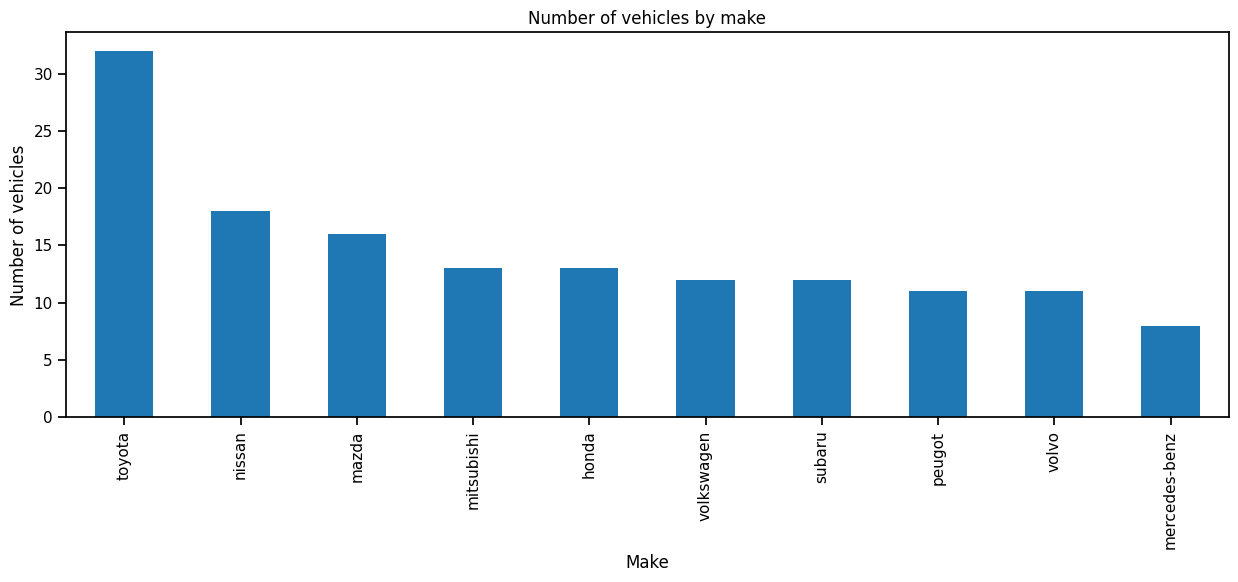

In [76]:
df_automobile.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

#####Histogram rating risiko asuransi kendaraan

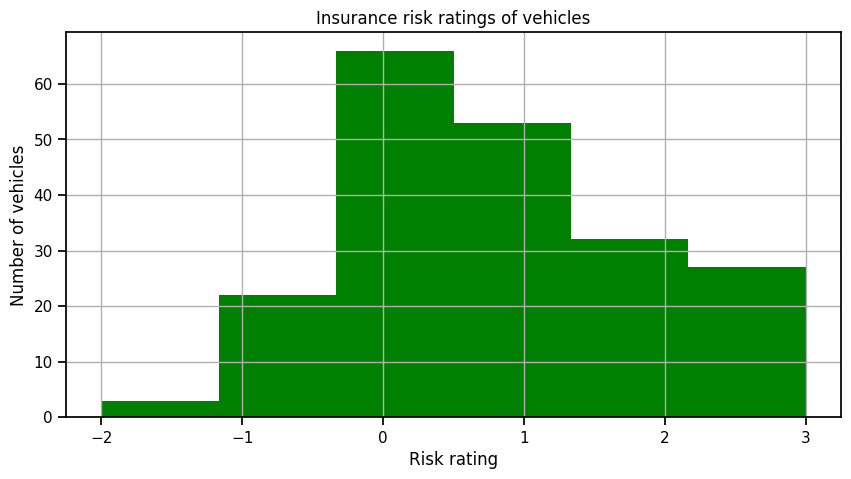

In [77]:
df_automobile.symboling.hist(bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

#####Histogram normalisasi kerugian

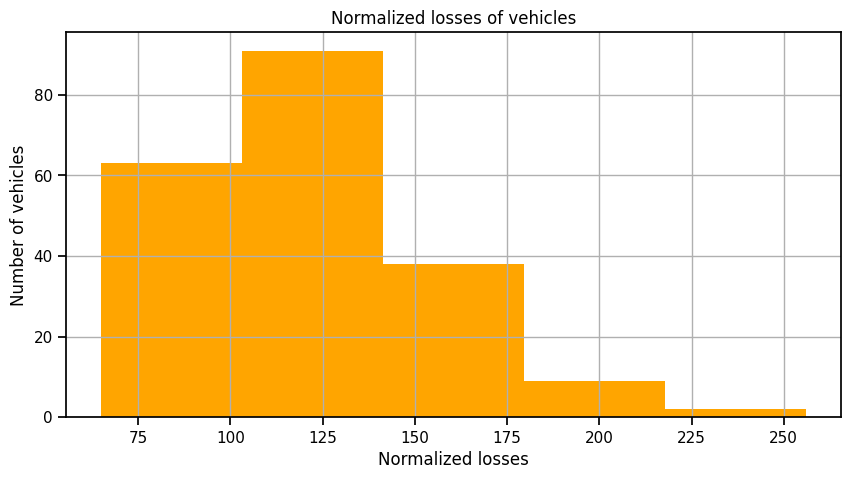

In [78]:
df_automobile['normalized-losses'].hist(bins=5,color='orange');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses');

##### Barchart tipe bahan bakar

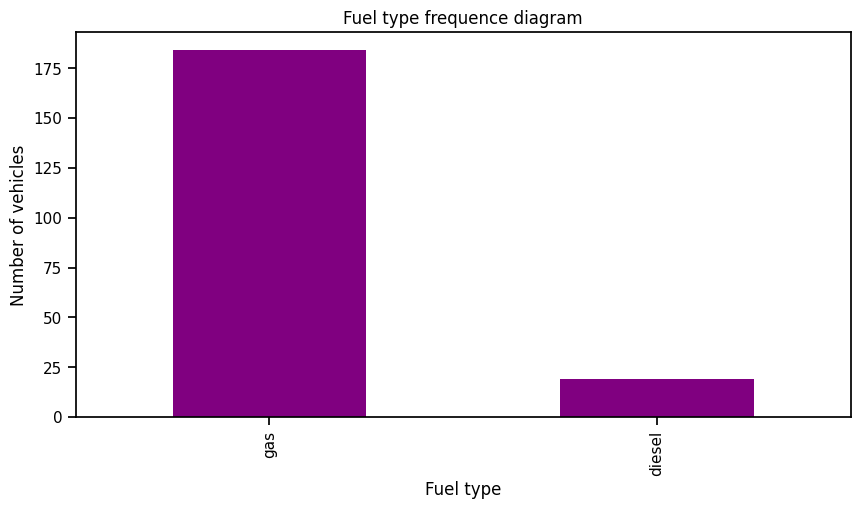

In [79]:
df_automobile['fuel-type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

##### Diagram Piechart tipe bahan bakar

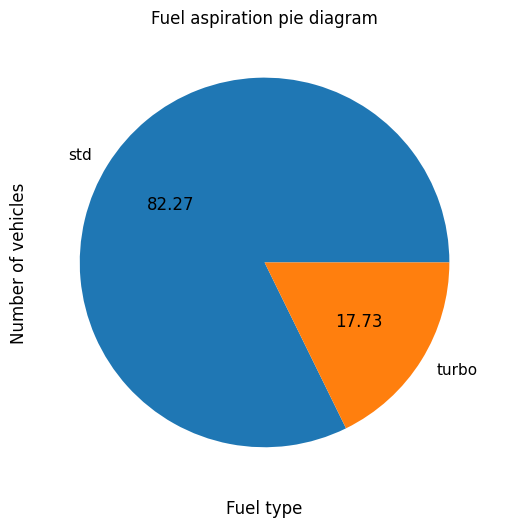

In [109]:
df_automobile['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel aspiration pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

##### Histogram tenaga mesin

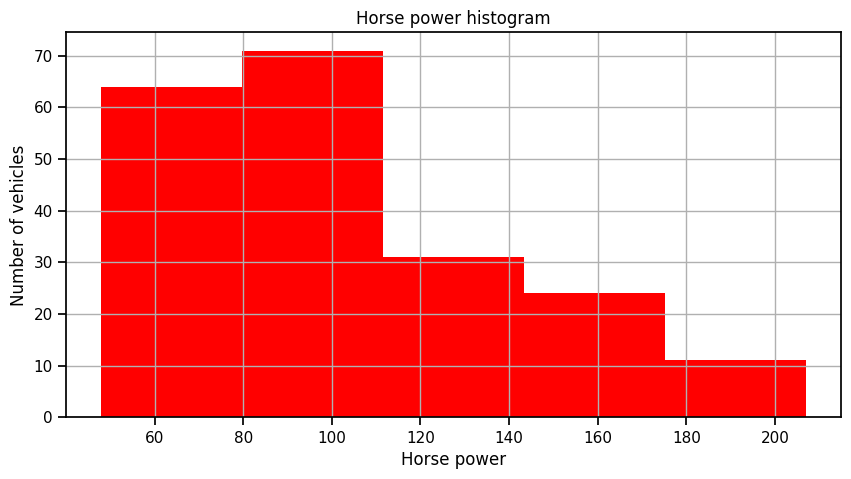

In [81]:
df_automobile.horsepower[np.abs(df_automobile.horsepower-df_automobile.horsepower.mean())<=(3*df_automobile.horsepower.std())].hist(bins=5,color='red');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

##### Histogram berat beban isi kendaraan

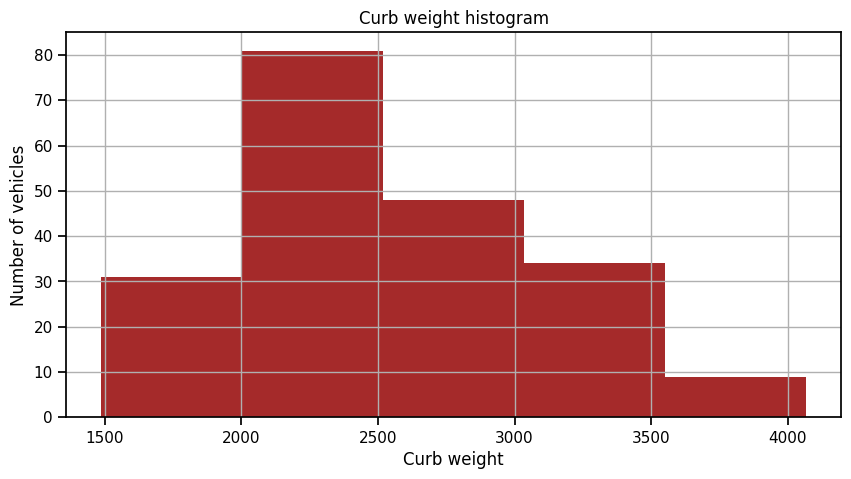

In [82]:
df_automobile['curb-weight'].hist(bins=5,color='brown');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

##### Barchart tipe pengerak roda kendaraan

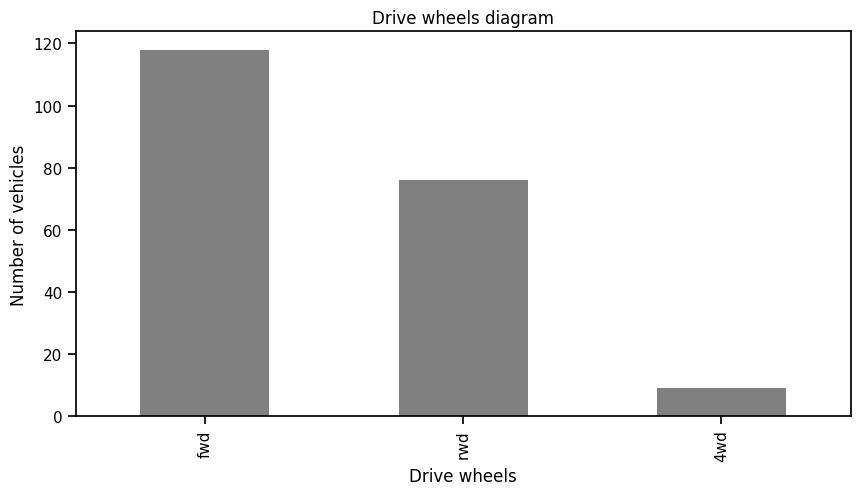

In [83]:
df_automobile['drive-wheels'].value_counts().plot(kind='bar',color='grey')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

##### Barchart jumlah pintu  kendaraan

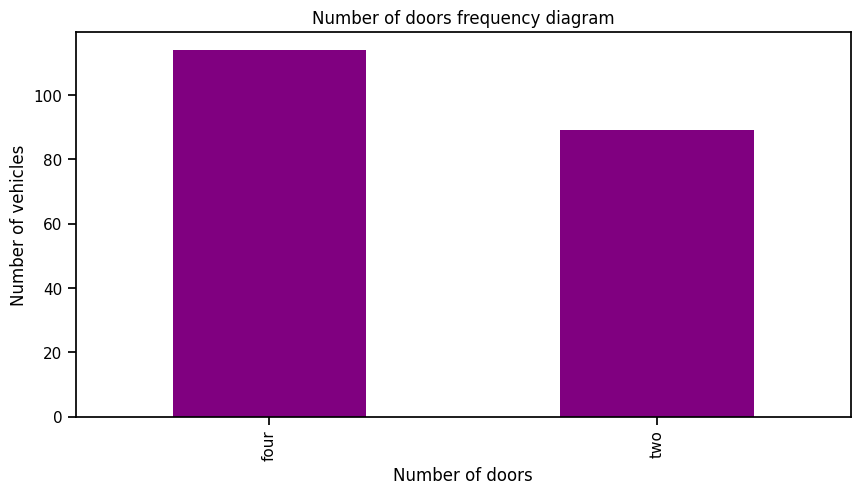

In [84]:
df_automobile['num-of-doors'].value_counts().plot(kind='bar',color='purple')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

Temuan

Kami telah mengambil beberapa fitur utama dari kumpulan data mobil untuk analisis ini dan berikut adalah temuan kami:


*   Toyota adalah merek mobil yang memiliki jumlah kendaraan paling banyak dengan lebih dari 40% dari Nissan yang berada di posisi kedua.
*   Jenis bahan bakar yang paling disukai oleh pelanggan adalah standar vs turbo dengan lebih dari 80% pilihan.
*   Untuk penggerak roda, penggerak roda depan memiliki jumlah mobil terbanyak diikuti oleh penggerak roda belakang dan penggerak empat roda. Ada sangat sedikit mobil untuk penggerak empat roda.
*   Berat trotoar mobil didistribusikan antara 1500 dan 4000 kira-kira.
*   Simbolisasi atau peringkat risiko asuransi memiliki peringkat antara -3 dan 3, namun untuk kumpulan data kami dimulai dari -2. Ada lebih banyak mobil di kisaran 0 dan 1.
*   Kerugian yang dinormalisasi yang merupakan pembayaran kerugian rata-rata per tahun kendaraan yang diasuransikan memiliki lebih banyak jumlah mobil di kisaran antara 65 dan 150.











#### Correlation Analysis

Temuan: Ada beberapa kesimpulan bagus yang dapat kita ambil dari heatmap korelasi.


*   Harga lebih berkorelasi dengan ukuran mesin dan bobot trotoar mobil.
*   Bobot trotoar sebagian besar berkorelasi dengan ukuran mesin, panjang, lebar, dan jarak sumbu roda, seperti yang diharapkan karena ini menambah bobot mobil.
*   Jarak sumbu roda sangat berkorelasi dengan panjang dan lebar mobil.
*   Simbol dan mobil normalisasi lebih berkorelasi daripada bidang lainnya.








<ipython-input-85-89f5f48ef26e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_automobile.corr()


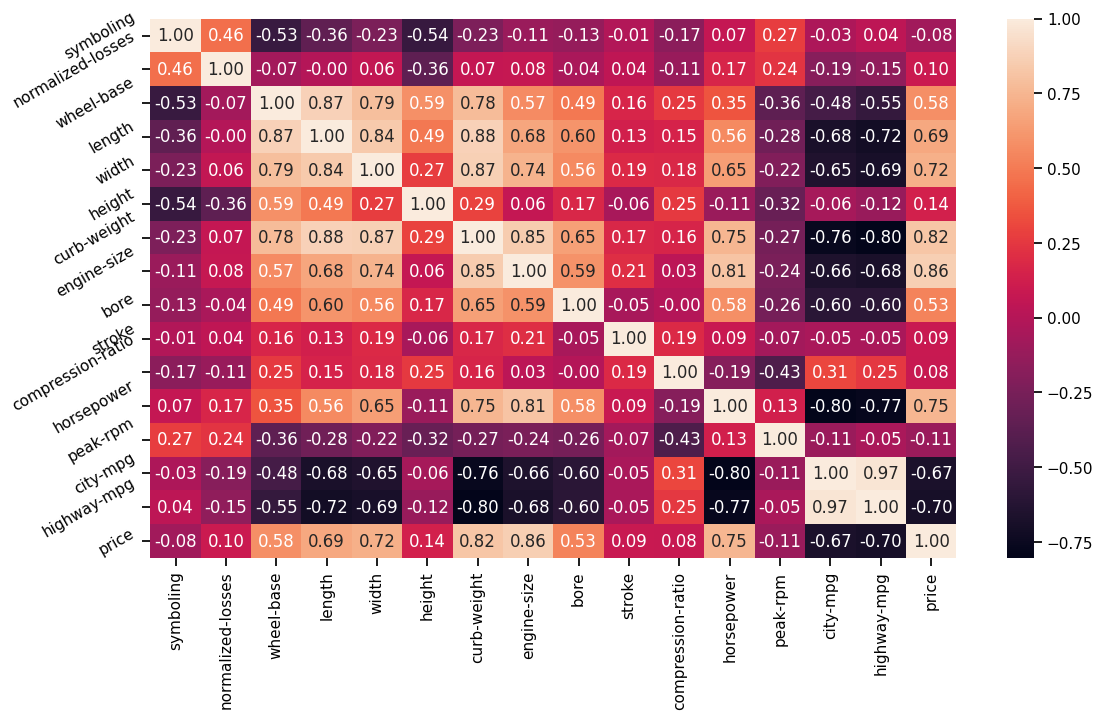

In [85]:
corr = df_automobile.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

#### Bivariate Analysis

##### Boxplot Harga dan pembuatan


Temuan: Berikut adalah temuan kami tentang merek dan harga mobil:


*   Mobil paling mahal diproduksi oleh Mercedes benz dan yang paling murah adalah Chevrolet.
*   Mobil premium dengan harga lebih dari 20.000 adalah BMW, Jaquar, Mercedes benz, dan Porsche.
*   Mobil murah dengan harga kurang dari 10.000 adalah Chevrolet, Dodge, Honda, Mitsubishi, Plymoth, dan Subaru.
*   Mobil lainnya berada di kisaran menengah antara 10.000 dan 20.000 yang memiliki jumlah mobil tertinggi.


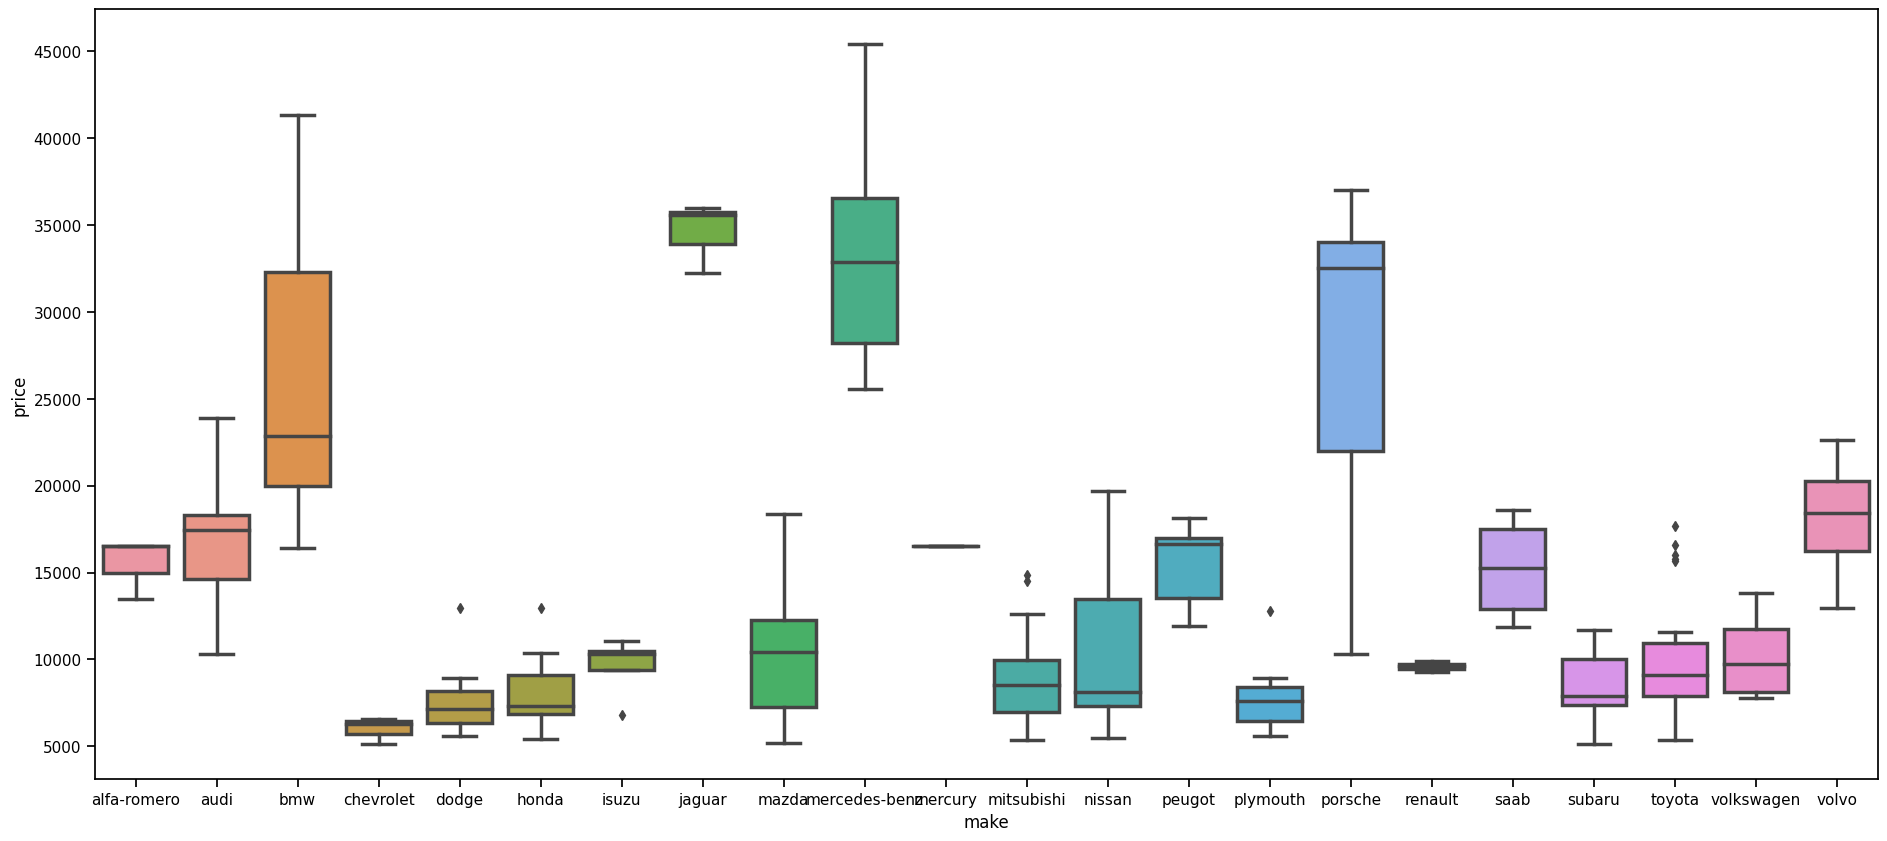

In [86]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=df_automobile)

##### Scatter plot harga dan ukuran mesin

Findings: The more the engine size the costlier the price is

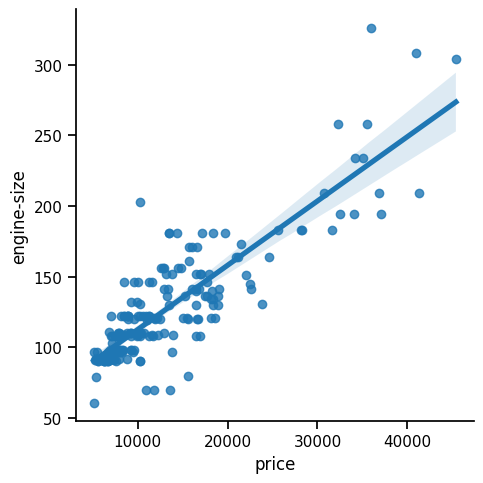

In [87]:
g = sns.lmplot(x='price', y='engine-size',data=df_automobile);

##### Scatter plot kerugian dan simbol yang dinormalisasi

Findings: From the scattered plot, it's very evident that the lesser the rating lesser the normalized loss. It looks like the negative ratings are better for the car which has lesser losses.

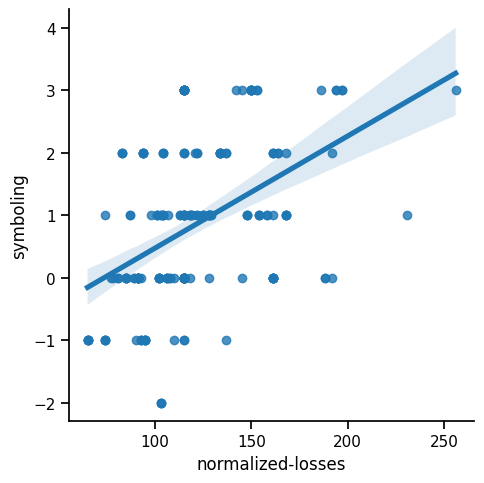

In [88]:
g = sns.lmplot(x='normalized-losses',y="symboling", data=df_automobile);

##### Scatter plot ukuran Engine dan RPM limit

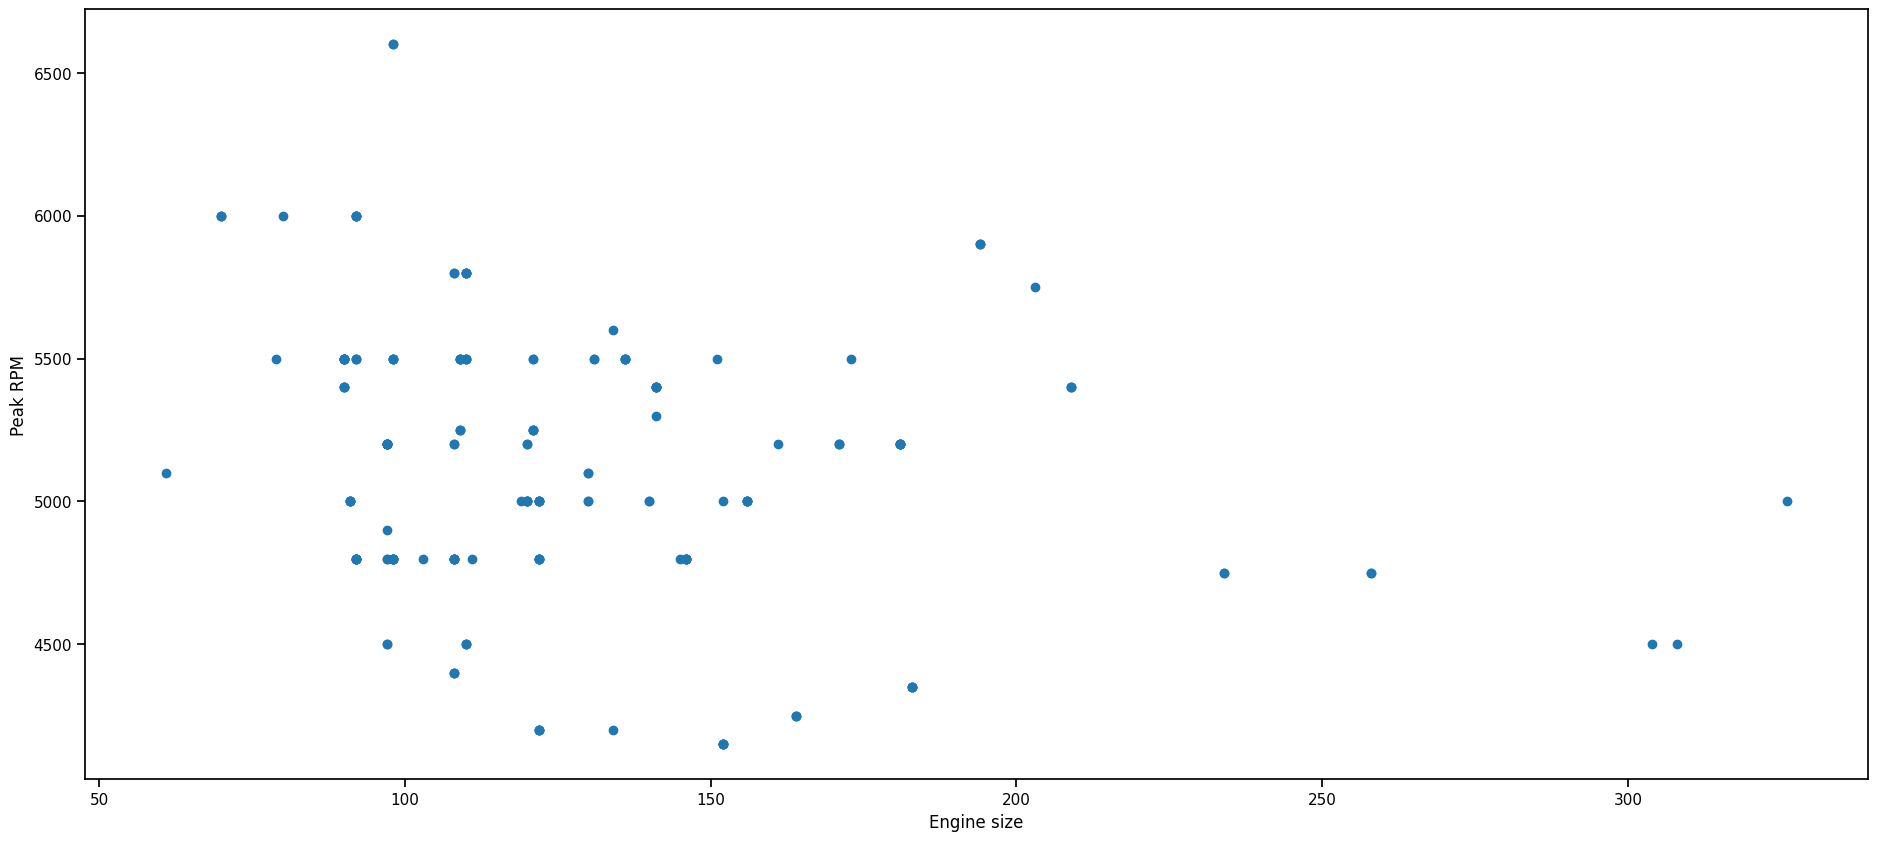

In [89]:
plt.scatter(df_automobile['engine-size'],df_automobile['peak-rpm'])
plt.xlabel('Engine size')
plt.ylabel('Peak RPM');

##### Scatter plot  MPG Kota dan Jalan Raya, Berat trotoar berdasarkan Merek mobil

Berdasarkan scatter plot dan kumpulan data yang disediakan, jelas bahwa untuk jarak tempuh kota dan jalan raya mobil berbanding terbalik dengan berat trotoar.

Lebih berat Mobil kurang adalah jarak tempuh untuk Kota dan Jalan Raya

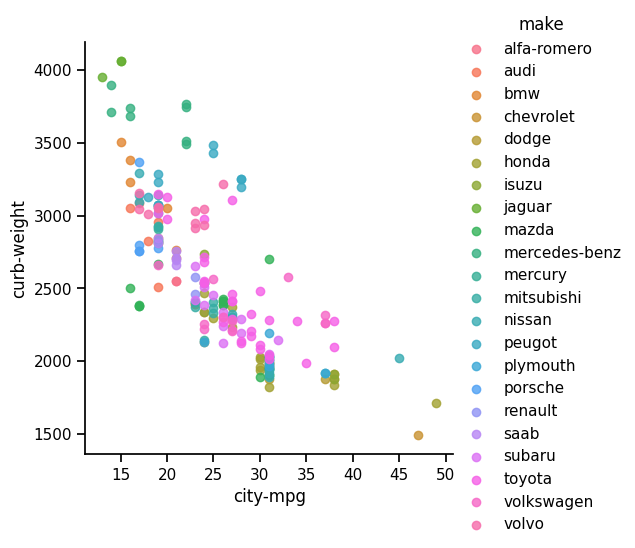

In [90]:
g = sns.lmplot(x='city-mpg',y="curb-weight", data=df_automobile, hue="make", fit_reg=False);

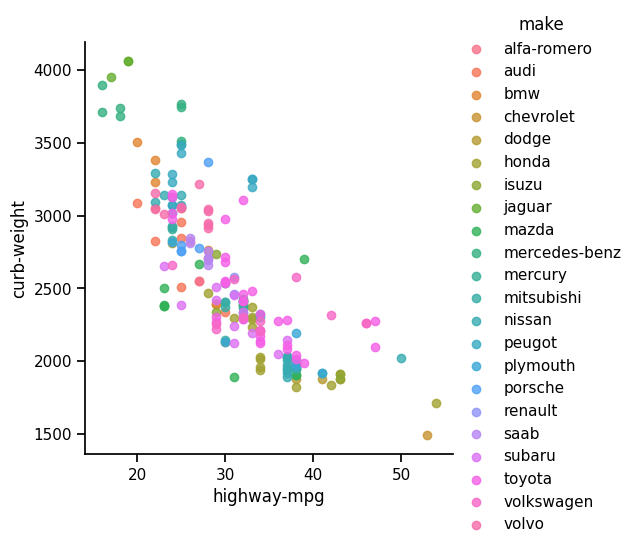

In [91]:
g = sns.lmplot(x='highway-mpg',y="curb-weight", data=df_automobile, hue="make",fit_reg=False);

##### Diagram barchart Roda penggerak dan  MPG Kota

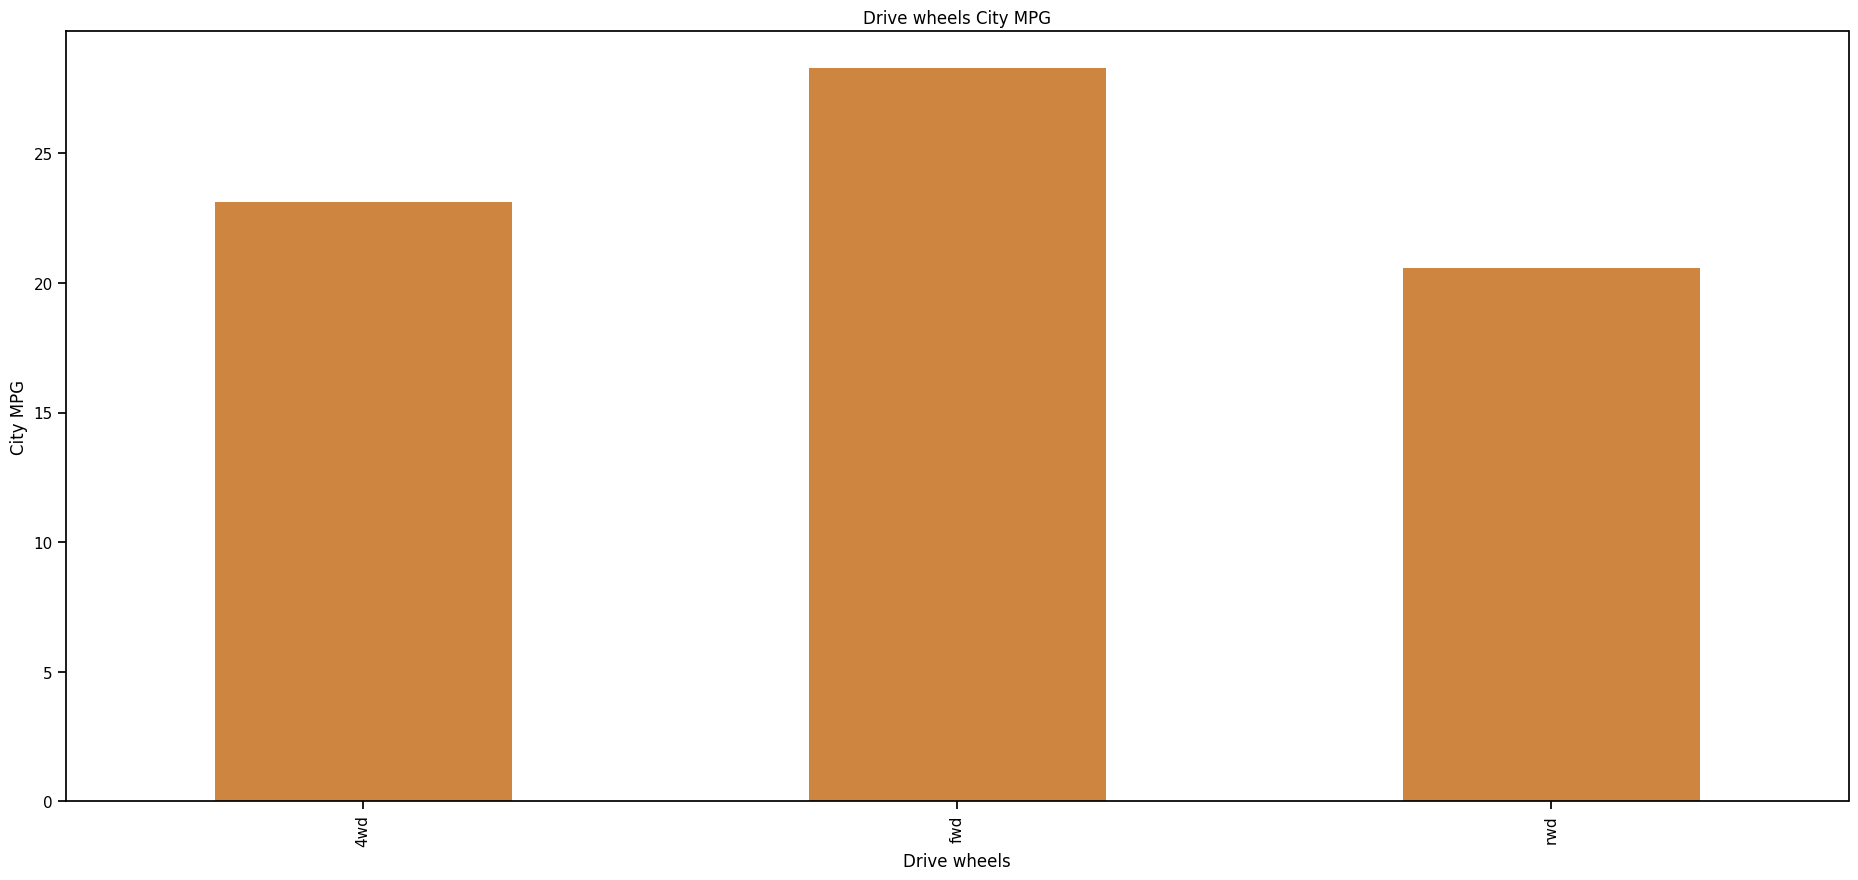

In [92]:
df_automobile.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');

##### Diagram barchart Roda penggerak dan  MPG jalan raya

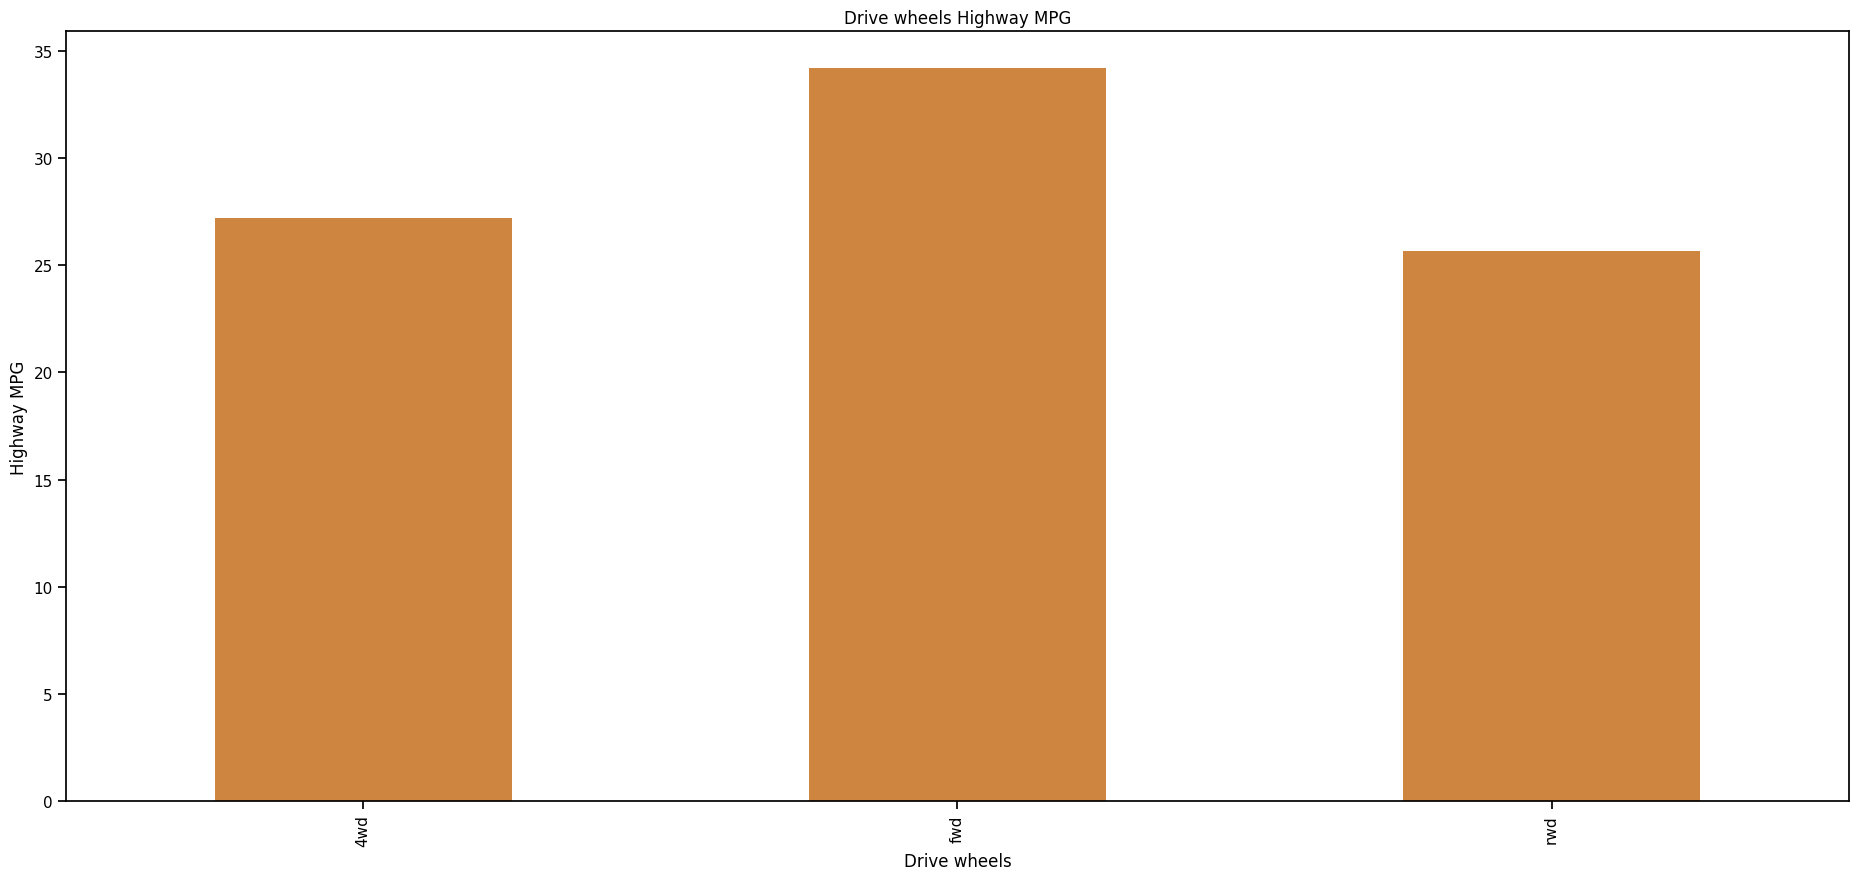

In [93]:
df_automobile.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels Highway MPG")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels');

##### Box plot jumlah ban dan harga

Penemuan: Sangat jelas bahwa mobil penggerak roda belakang adalah mobil paling mahal dan mobil penggerak roda depan adalah mobil paling murah. Mobil penggerak empat roda sedikit lebih mahal daripada mobil penggerak roda depan. Ada sangat sedikit mobil penggerak empat roda dalam dataset kami sehingga gambaran ini mungkin tidak terlalu akurat.

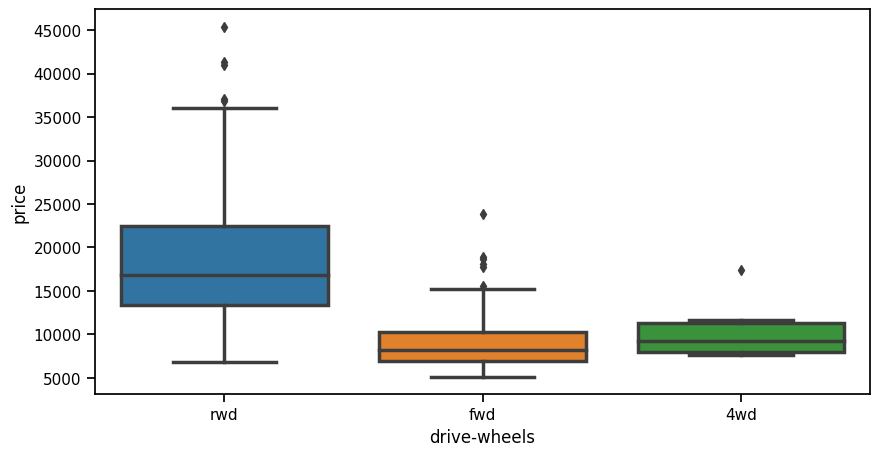

In [94]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=df_automobile)

##### Kerugian yang dinormalisasi berdasarkan gaya mobil dan tidak Jumlah pintu

Temuan:

Sebagaimana yang kita pahami, kerugian normalisasi yang merupakan pembayaran kerugian rata-rata per kendaraan yang diasuransikan dihitung dengan banyak fitur mobil, termasuk gaya bodi dan jumlah pintu. Kerugian normalisasi didistribusikan di berbagai gaya bodi, tetapi mobil dua pintu memiliki lebih banyak kerugian daripada mobil empat pintu.

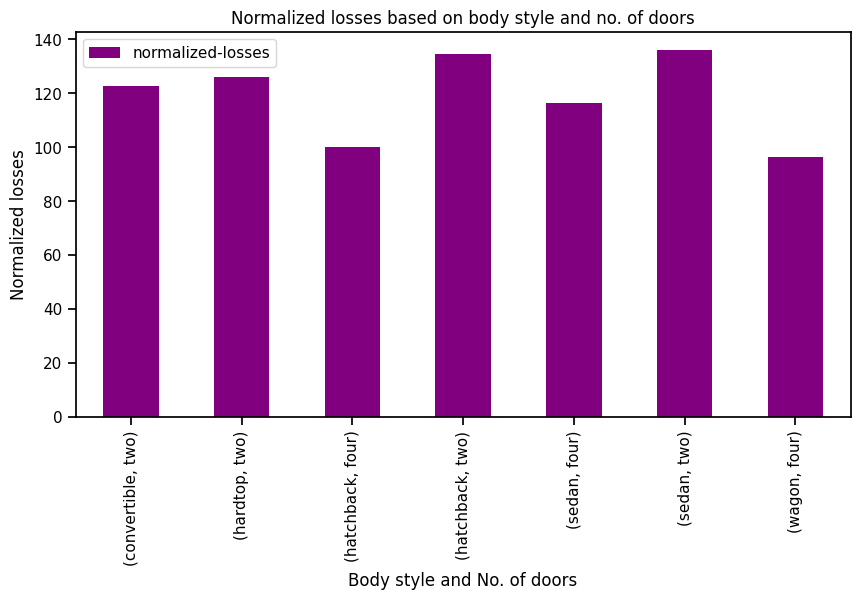

In [95]:
pd.pivot_table(df_automobile,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');

## Conclusion

Analisis dari kumpulan data memberikan:


*   Bagaimana kumpulan data didistribusikan
*   Korelasi antara bidang yang berbeda dan bagaimana mereka terkait
*   Kerugian normalisasi dari produsen
*   Symboling: Mobil awalnya diberi simbol faktor risiko yang terkait dengan harganya
*   Mileage: Mileage berdasarkan berkendara di Kota dan Jalan Raya untuk berbagai merek dan atribut
*   Price: Faktor-faktor yang mempengaruhi Harga Mobil.
*   Pentingnya penggerak roda dan berat isi



In [96]:
df_automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450


In [97]:
df_automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,199.000000,199.000000,203.000000,203.000000,201.000000,203.000000,203.000000,203.00000
mean,0.837438,120.492611,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,3.330955,3.254070,10.093202,104.374384,5125.870647,25.172414,30.699507,13184.53202
std,1.250021,31.901359,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,0.274054,0.318023,3.888216,39.623447,479.820136,6.529812,6.874645,7909.62512
min,-2.000000,65.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.00000
25%,0.000000,101.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7781.50000
50%,1.000000,115.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.00000
75%,2.000000,137.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.00000
max,3.000000,256.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.00000


## Jenis Mobil Terbanyak

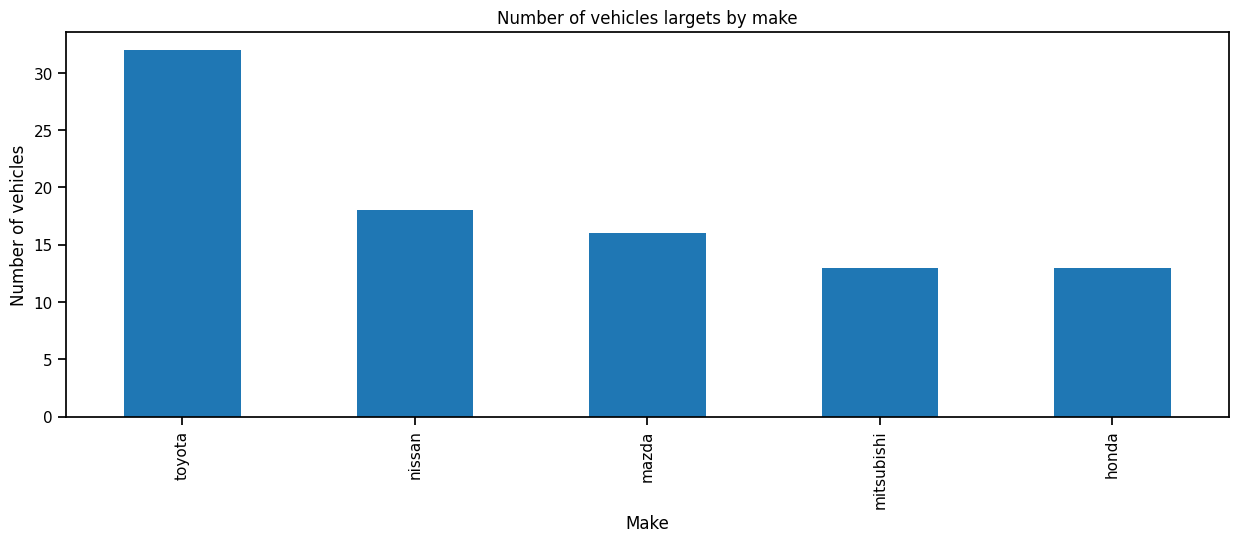

In [98]:
df_automobile.make.value_counts().nlargest(5).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles largets by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

In [99]:
df_automobile.make.value_counts().reset_index().head(5)

,index,make
0,toyota,32
1,nissan,18
2,mazda,16
3,mitsubishi,13
4,honda,13


## Jenis Bbm Terbanyak

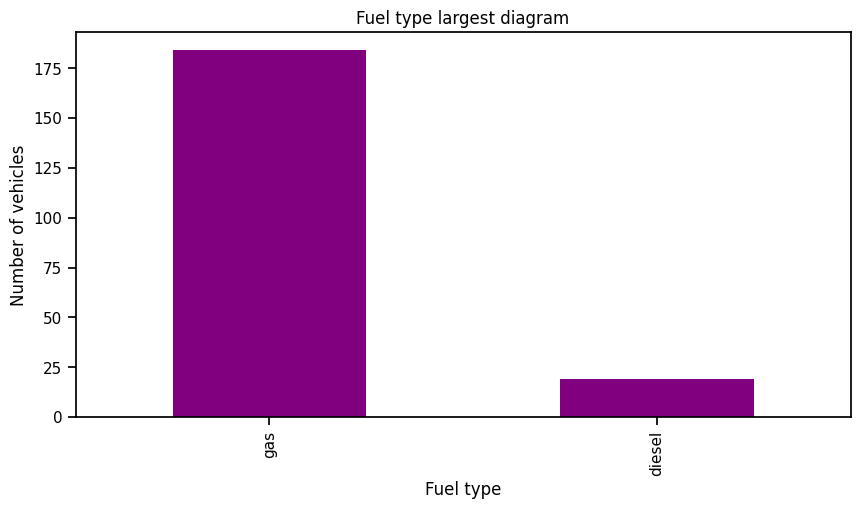

In [100]:
df_automobile['fuel-type'].value_counts().nlargest().plot(kind='bar',color='purple')
plt.title("Fuel type largest diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

In [101]:
df_automobile['fuel-type'].value_counts().reset_index().head()

,index,fuel-type
0,gas,184
1,diesel,19


## 5 Jenis mobil horse power Terbesar

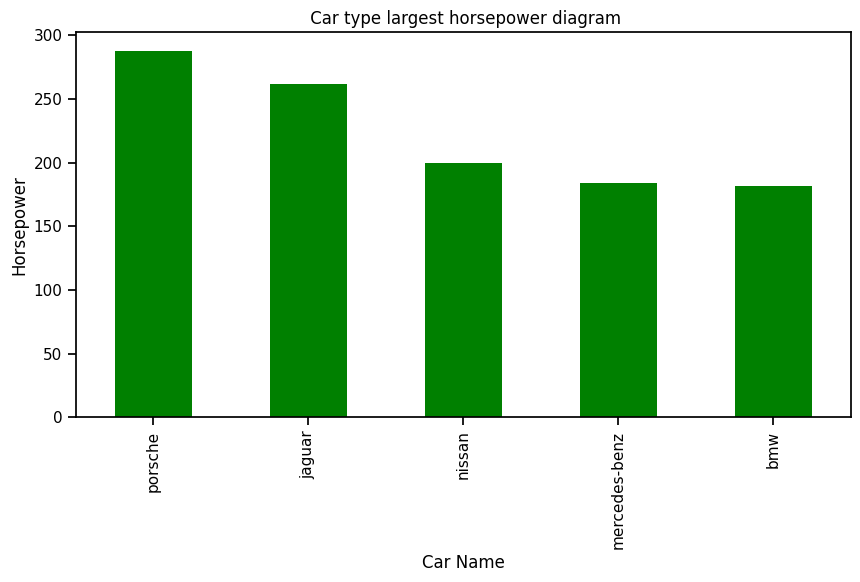

In [102]:
df_automobile.groupby(by='make').horsepower.max().nlargest(5).sort_values(ascending=False).plot(kind='bar',color='green')
plt.title(" Car type largest horsepower diagram")
plt.ylabel('Horsepower')
plt.xlabel('Car Name');

In [103]:
hpbesar=df_automobile.groupby(by='make').horsepower.max().nlargest(5).sort_values(ascending=False)
hpbesar.reset_index().set_index('make').round(2).head(10)

,horsepower
make,
porsche,288
jaguar,262
nissan,200
mercedes-benz,184
bmw,182


## Mobil dgn bahan bakar Gas dan bertipe Sedan

In [104]:
mobil_gas_sedan = df_automobile[(df_automobile['fuel-type']=='gas')&(df_automobile['body-style']=='sedan')][['make','fuel-type','body-style']].value_counts().reset_index()
mobil_gas_sedan = mobil_gas_sedan.rename(columns = {0:'Jumlah'})
mobil_gas_sedan

,make,fuel-type,body-style,Jumlah
0,toyota,gas,sedan,8
1,nissan,gas,sedan,8
2,bmw,gas,sedan,8
3,volvo,gas,sedan,7
4,mazda,gas,sedan,5
5,volkswagen,gas,sedan,5
6,subaru,gas,sedan,5
7,audi,gas,sedan,5
8,honda,gas,sedan,5
9,peugot,gas,sedan,4


In [105]:
#cara ubah nama colum
#df = df.rename(columns={'make':'merk_mobil'})

In [106]:
df_automobile.to_csv("clear_automobile.csv", index=False)

In [107]:
df_automobile.to_excel("clear_automobile.xlsx", index=False)

In [108]:
df12=pd.read_csv("/content/clear_automobile.csv")
df12

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485
201,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470
